In [1]:
import numpy as np
from matplotlib import pyplot as plt

from my_utils import *

from laplace2D import *

import copy

In [2]:
my_grid = grid(-1.5,1.5,.025,-1,1,.025)

c1 = conductor(-1.4,1.4,-0.5,0,V=-1.)
c2 = conductor(-.3,.3,0.2,0.3,V=1.)
conductor_list = [c1,c2]

In [3]:
V = field(grid=my_grid)

In [4]:
fixed_mask, start_potential = conductors_to_mask(my_grid,conductor_list)

In [5]:
potential = copy.deepcopy(start_potential)

In [6]:
for i in range(10000):
    relax_2D(potential,fixed_mask)

In [7]:
relax_2D(potential,fixed_mask)

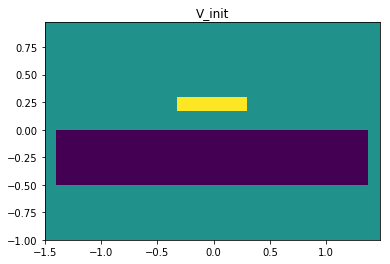

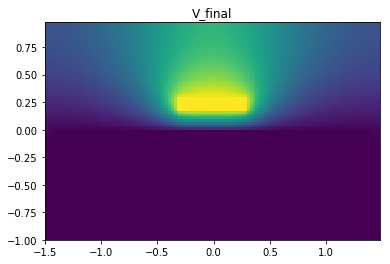

In [8]:
#small_figure()

scale= 1

plt.pcolormesh(my_grid.X,my_grid.Y,start_potential.matrix)
plt.clim(-scale,scale)
plt.title("V_init")
plt.show()

plt.pcolormesh(my_grid.X,my_grid.Y,potential.matrix)
plt.clim(-scale,scale)
plt.title("V_final")
plt.show()

In [9]:
E = E_from_V(potential)

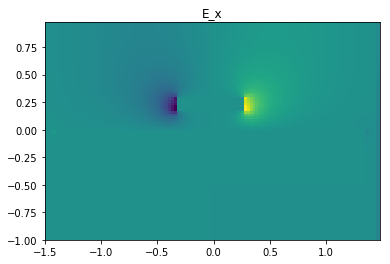

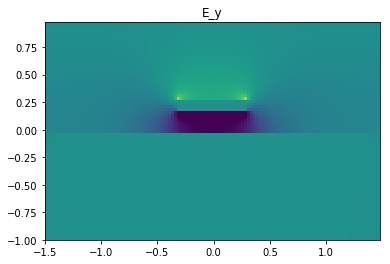

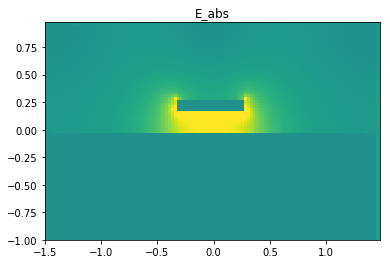

In [10]:
scale = 10

plt.pcolormesh(my_grid.X,my_grid.Y,E.matrix[:,:,0])
plt.clim(-scale,scale)
plt.title("E_x")
plt.show()

plt.pcolormesh(my_grid.X,my_grid.Y,E.matrix[:,:,1])
plt.clim(-scale,scale)
plt.title("E_y")
plt.show()

e_abs = np.sqrt(E.matrix[:,:,0]**2 + E.matrix[:,:,1]**2)
plt.pcolormesh(my_grid.X,my_grid.Y,e_abs)
plt.clim(-scale,scale)
plt.title("E_abs")
plt.show()

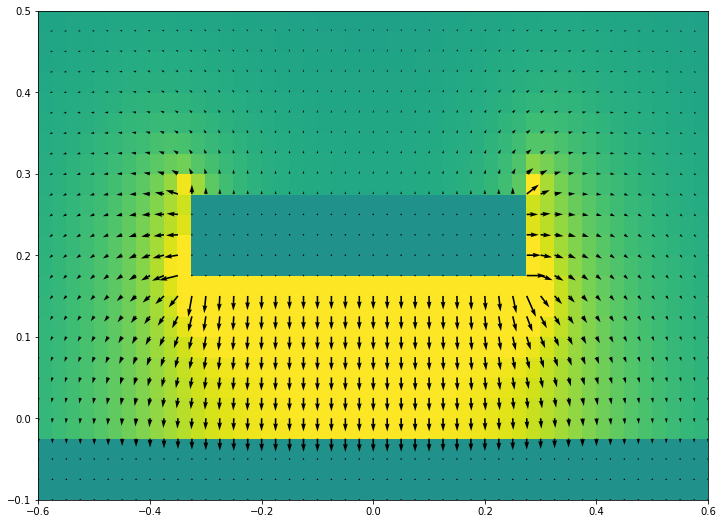

In [11]:
big_figure()

e_abs = np.sqrt(E.matrix[:,:,0]**2 + E.matrix[:,:,1]**2)
plt.pcolormesh(my_grid.X,my_grid.Y,e_abs)
plt.clim(-scale,scale)
plt.quiver(my_grid.X,my_grid.Y,E.matrix[:,:,0],E.matrix[:,:,1], scale=.5e3)

plt.xlim(-0.6,0.6)
plt.ylim(-0.1,0.5)
plt.show()

In [12]:
rho = rho_from_V(potential)

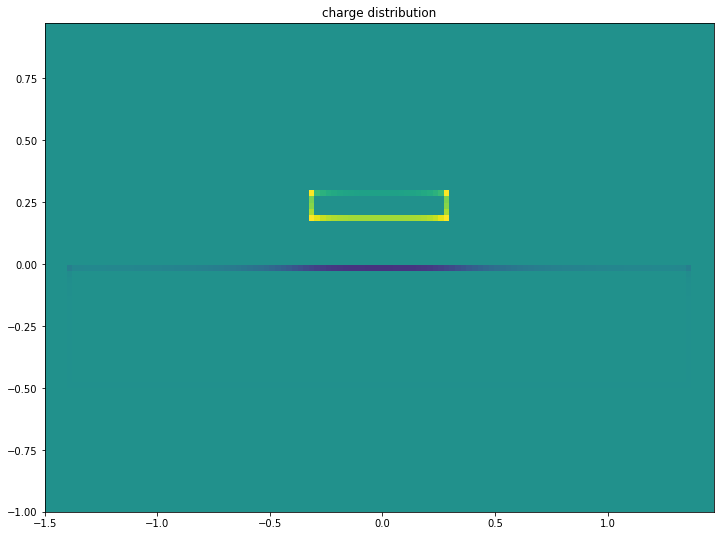

In [18]:
scale = 5000e-12

plt.pcolormesh(my_grid.X,my_grid.Y,rho.matrix)
plt.clim(-scale,scale)
plt.title("charge distribution")
plt.show()